# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
DATA_PATH = "../data"
df_train = pd.read_csv(f"{DATA_PATH}/train.csv")
df_test = pd.read_csv(f"{DATA_PATH}/test.csv")

In [3]:
df_train.to_csv(f"{DATA_PATH}/df.csv", index=False)

# Preprocessing

In order to proceed with futher analysis, I will divide the training dataset into two: before the vaccine and after the vaccine. 

## Initial Preprocessing

In [4]:
df_train

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
0,911530868,World,2372.0,2020,0.300,65.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.0
1,807936902,World,5023.0,2020,0.635,114.0,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0
2,773590408,World,5612.0,2020,0.710,116.0,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.0
3,130466459,World,7580.0,2020,0.958,153.0,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0
4,544040446,World,8983.0,2020,1.136,187.0,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129151,541829605,Zimbabwe,464.0,2022,29.012,13.0,0.813,11949993.0,6297324.0,4601845.0,1050824.0,5665.0,74.72,39.37,28.77,6.57,354.0,1427.0,0.009,9.0
129152,969939474,Zimbabwe,471.0,2022,29.449,12.0,0.750,11958771.0,6299348.0,4605821.0,1053602.0,5295.0,74.77,39.39,28.80,6.59,331.0,1362.0,0.009,7.0
129153,667902340,Zimbabwe,450.0,2022,28.136,13.0,0.813,NaN,NaN,NaN,NaN,5316.0,NaN,NaN,NaN,NaN,332.0,1483.0,0.009,5.0
129154,961193720,Zimbabwe,277.0,2022,17.320,6.0,0.375,11974313.0,6305470.0,4611113.0,1057730.0,5358.0,74.87,39.43,28.83,6.61,335.0,1633.0,0.010,7.0


In [5]:
df_test

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
0,719557359,Monaco,185.0,2021,5042.796,0.0,0.000,NaN,NaN,NaN,NaN,158.0,NaN,NaN,NaN,NaN,4307.0,23.0,0.063
1,507527289,Liechtenstein,78.0,2020,1998.002,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,821551528,Albania,230.0,2022,80.569,1.0,0.350,NaN,NaN,NaN,NaN,1462.0,NaN,NaN,NaN,NaN,512.0,391.0,0.014
3,696602016,Niger,14.0,2022,0.554,1.0,0.040,NaN,NaN,NaN,NaN,72018.0,NaN,NaN,NaN,NaN,2852.0,60442.0,0.239
4,680387432,French Polynesia,1033.0,2022,3397.669,0.0,0.000,366984.0,186177.0,180807.0,NaN,22.0,120.71,61.24,59.47,NaN,72.0,22.0,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43047,713850901,Luxembourg,585.0,2021,915.033,0.0,0.000,766418.0,408405.0,NaN,455.0,991.0,119.88,63.88,NaN,0.07,1550.0,466.0,0.073
43048,980183629,Colombia,18120.0,2020,351.732,584.0,11.336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43049,386597907,United Kingdom,38399.0,2021,570.725,592.0,8.799,30691557.0,28327873.0,2363684.0,NaN,598286.0,45.62,42.10,3.51,NaN,8892.0,498281.0,0.741
43050,293365001,Cyprus,22.0,2020,24.553,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_b4v = df_train.loc[df_train["Total Vaccinations"].isna() & df_train["Daily Vaccinations"].isna()] # Also checking the daily vaccinations so we don't include the first day of vaccination
df_b4v

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
0,911530868,World,2372.0,2020,0.300,65.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.0
1,807936902,World,5023.0,2020,0.635,114.0,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0
2,773590408,World,5612.0,2020,0.710,116.0,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.0
3,130466459,World,7580.0,2020,0.958,153.0,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0
4,544040446,World,8983.0,2020,1.136,187.0,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128747,713525252,Zimbabwe,617.0,2021,38.578,82.0,5.127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
128748,180549162,Zimbabwe,620.0,2021,38.766,74.0,4.627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
128749,949437505,Zimbabwe,564.0,2021,35.264,71.0,4.439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0
128750,451524791,Zimbabwe,534.0,2021,33.389,61.0,3.814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0


In [7]:
df_b4v.to_csv(f"{DATA_PATH}/train_b4v.csv", index=False)

In [8]:
df_av = df_train[~df_train.isin(df_b4v)].dropna(how="all")
df_av

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
221,563444119.0,World,4148513.0,2020.0,524.511,73380.0,9.278,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,0.0,0.0,0.000,77091.0
222,958550508.0,World,4246307.0,2020.0,536.876,75053.0,9.489,0.0,0.0,NaN,NaN,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000,76922.0
223,468761248.0,World,4248127.0,2020.0,537.106,75971.0,9.605,1.0,1.0,NaN,NaN,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000,77648.0
224,993915047.0,World,4284262.0,2020.0,541.674,77106.0,9.749,1.0,1.0,NaN,NaN,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000,77953.0
225,148844298.0,World,4333098.0,2020.0,547.849,77629.0,9.815,1.0,1.0,NaN,NaN,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000,78095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129151,541829605.0,Zimbabwe,464.0,2022.0,29.012,13.0,0.813,11949993.0,6297324.0,4601845.0,1050824.0,5665.0,74.72,39.37,28.77,6.57,354.0,1427.0,0.009,9.0
129152,969939474.0,Zimbabwe,471.0,2022.0,29.449,12.0,0.750,11958771.0,6299348.0,4605821.0,1053602.0,5295.0,74.77,39.39,28.80,6.59,331.0,1362.0,0.009,7.0
129153,667902340.0,Zimbabwe,450.0,2022.0,28.136,13.0,0.813,NaN,NaN,NaN,NaN,5316.0,NaN,NaN,NaN,NaN,332.0,1483.0,0.009,5.0
129154,961193720.0,Zimbabwe,277.0,2022.0,17.320,6.0,0.375,11974313.0,6305470.0,4611113.0,1057730.0,5358.0,74.87,39.43,28.83,6.61,335.0,1633.0,0.010,7.0


In [9]:
df_av.to_csv(f"{DATA_PATH}/train_av.csv", index=False)

## Treating missing data

### Checking before the vaccine

In [10]:
df_b4v.notna().sum()

Id                                     51172
Location                               51172
Weekly Cases                           51016
Year                                   51172
Weekly Cases per Million               50361
Weekly Deaths                          50064
Weekly Deaths per Million              49413
Total Vaccinations                         0
People Vaccinated                         78
People Fully Vaccinated                   68
Total Boosters                             4
Daily Vaccinations                         0
Total Vaccinations per Hundred             0
People Vaccinated per Hundred             78
People Fully Vaccinated per Hundred       68
Total Boosters per Hundred                 4
Daily Vaccinations per Hundred             0
Daily People Vaccinated                  192
Daily People Vaccinated per Hundred      192
Next Week's Deaths                     51172
dtype: int64

There are 78 occurences of People Vaccinated, that should not be happening.

In [11]:
df_b4v.loc[df_b4v["People Vaccinated"].notna()]

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
31222,343994044,Cuba,8473.0,2021,752.729,72.0,6.396,NaN,455908.0,NaN,NaN,NaN,NaN,4.05,NaN,NaN,NaN,96477.0,0.857,73.0
31223,912487837,Cuba,8414.0,2021,747.488,73.0,6.485,NaN,540002.0,NaN,NaN,NaN,NaN,4.80,NaN,NaN,NaN,94000.0,0.835,76.0
31224,573668672,Cuba,8587.0,2021,762.857,71.0,6.308,NaN,612376.0,NaN,NaN,NaN,NaN,5.44,NaN,NaN,NaN,90396.0,0.803,75.0
31226,294990570,Cuba,8785.0,2021,780.447,62.0,5.508,NaN,717997.0,NaN,NaN,NaN,NaN,6.38,NaN,NaN,NaN,78789.0,0.700,81.0
31227,754881757,Cuba,8611.0,2021,764.989,67.0,5.952,NaN,774212.0,NaN,NaN,NaN,NaN,6.88,NaN,NaN,NaN,59254.0,0.526,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64153,187911362,Kazakhstan,333.0,2022,17.347,1.0,0.052,NaN,9522541.0,9304087.0,NaN,NaN,NaN,49.61,48.47,NaN,NaN,495.0,0.003,0.0
64155,898399739,Kazakhstan,613.0,2022,31.933,1.0,0.052,NaN,9523631.0,9306077.0,NaN,NaN,NaN,49.61,48.48,NaN,NaN,560.0,0.003,0.0
64157,188347305,Kazakhstan,707.0,2022,36.830,0.0,0.000,NaN,9524896.0,9308744.0,NaN,NaN,NaN,49.62,48.49,NaN,NaN,524.0,0.003,0.0
64158,641884893,Kazakhstan,645.0,2022,33.600,0.0,0.000,NaN,9525645.0,9310076.0,NaN,NaN,NaN,49.62,48.50,NaN,NaN,629.0,0.003,0.0


These occurences will be removed.

In [12]:
df_b4v = df_b4v.loc[df_b4v["People Vaccinated"].isna()]
df_b4v.notna().sum()

Id                                     51094
Location                               51094
Weekly Cases                           50938
Year                                   51094
Weekly Cases per Million               50283
Weekly Deaths                          49986
Weekly Deaths per Million              49335
Total Vaccinations                         0
People Vaccinated                          0
People Fully Vaccinated                    2
Total Boosters                             0
Daily Vaccinations                         0
Total Vaccinations per Hundred             0
People Vaccinated per Hundred              0
People Fully Vaccinated per Hundred        2
Total Boosters per Hundred                 0
Daily Vaccinations per Hundred             0
Daily People Vaccinated                  115
Daily People Vaccinated per Hundred      115
Next Week's Deaths                     51094
dtype: int64

I will also remove the occurences of People Fully Vaccinated, People Fully Vaccinated per Hundred, Daily People Vaccinated and Daily People Vaccinated per Hundred.

In [13]:
df_b4v = df_b4v.loc[df_b4v["People Fully Vaccinated"].isna() & df_b4v["People Fully Vaccinated per Hundred"].isna() & df_b4v["Daily People Vaccinated"].isna() & df_b4v["Daily People Vaccinated per Hundred"].isna()]
df_b4v.notna().sum()

Id                                     50979
Location                               50979
Weekly Cases                           50823
Year                                   50979
Weekly Cases per Million               50168
Weekly Deaths                          49871
Weekly Deaths per Million              49220
Total Vaccinations                         0
People Vaccinated                          0
People Fully Vaccinated                    0
Total Boosters                             0
Daily Vaccinations                         0
Total Vaccinations per Hundred             0
People Vaccinated per Hundred              0
People Fully Vaccinated per Hundred        0
Total Boosters per Hundred                 0
Daily Vaccinations per Hundred             0
Daily People Vaccinated                    0
Daily People Vaccinated per Hundred        0
Next Week's Deaths                     50979
dtype: int64

In [14]:
df_b4v.dropna(axis=1, how="all", inplace=True)

Now, lets see the occurrences of nulls.

In [15]:
df_b4v

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths
0,911530868,World,2372.0,2020,0.300,65.0,0.008,344.0
1,807936902,World,5023.0,2020,0.635,114.0,0.014,361.0
2,773590408,World,5612.0,2020,0.710,116.0,0.015,431.0
3,130466459,World,7580.0,2020,0.958,153.0,0.019,463.0
4,544040446,World,8983.0,2020,1.136,187.0,0.024,506.0
...,...,...,...,...,...,...,...,...
128747,713525252,Zimbabwe,617.0,2021,38.578,82.0,5.127,34.0
128748,180549162,Zimbabwe,620.0,2021,38.766,74.0,4.627,36.0
128749,949437505,Zimbabwe,564.0,2021,35.264,71.0,4.439,31.0
128750,451524791,Zimbabwe,534.0,2021,33.389,61.0,3.814,34.0


Will not drop these columns for now since Next Week's Deaths will be used for the analysis.

In [16]:
df_b4v.to_csv(f"{DATA_PATH}/train_b4v.csv", index=False)

### Checking After the vaccine

In [17]:
df_av.isna().sum()

Id                                         0
Location                                   0
Weekly Cases                              57
Year                                       0
Weekly Cases per Million                  57
Weekly Deaths                            150
Weekly Deaths per Million                150
Total Vaccinations                     37714
People Vaccinated                      39633
People Fully Vaccinated                41478
Total Boosters                         58141
Daily Vaccinations                       144
Total Vaccinations per Hundred         37714
People Vaccinated per Hundred          39633
People Fully Vaccinated per Hundred    41478
Total Boosters per Hundred             58141
Daily Vaccinations per Hundred           144
Daily People Vaccinated                  785
Daily People Vaccinated per Hundred      785
Next Week's Deaths                         0
dtype: int64

Will not drop these columns for now since Next Week's Deaths will be used for the analysis.

## Data cleaning

### Joining df_b4v and df_av.

In [18]:
df_train = pd.concat([df_b4v, df_av])
df_train

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
0,911530868.0,World,2372.0,2020.0,0.300,65.0,0.008,344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,807936902.0,World,5023.0,2020.0,0.635,114.0,0.014,361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,773590408.0,World,5612.0,2020.0,0.710,116.0,0.015,431.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,130466459.0,World,7580.0,2020.0,0.958,153.0,0.019,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,544040446.0,World,8983.0,2020.0,1.136,187.0,0.024,506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129151,541829605.0,Zimbabwe,464.0,2022.0,29.012,13.0,0.813,9.0,11949993.0,6297324.0,4601845.0,1050824.0,5665.0,74.72,39.37,28.77,6.57,354.0,1427.0,0.009
129152,969939474.0,Zimbabwe,471.0,2022.0,29.449,12.0,0.750,7.0,11958771.0,6299348.0,4605821.0,1053602.0,5295.0,74.77,39.39,28.80,6.59,331.0,1362.0,0.009
129153,667902340.0,Zimbabwe,450.0,2022.0,28.136,13.0,0.813,5.0,NaN,NaN,NaN,NaN,5316.0,NaN,NaN,NaN,NaN,332.0,1483.0,0.009
129154,961193720.0,Zimbabwe,277.0,2022.0,17.320,6.0,0.375,7.0,11974313.0,6305470.0,4611113.0,1057730.0,5358.0,74.87,39.43,28.83,6.61,335.0,1633.0,0.010


Column Id does not have any meaning, so will be removed.

In [19]:
df_train.reset_index(inplace=True, drop=True)
df_train.drop(columns=["Id"], inplace=True)
df_train

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
0,World,2372.0,2020.0,0.300,65.0,0.008,344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,5023.0,2020.0,0.635,114.0,0.014,361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,World,5612.0,2020.0,0.710,116.0,0.015,431.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,World,7580.0,2020.0,0.958,153.0,0.019,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,World,8983.0,2020.0,1.136,187.0,0.024,506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128958,Zimbabwe,464.0,2022.0,29.012,13.0,0.813,9.0,11949993.0,6297324.0,4601845.0,1050824.0,5665.0,74.72,39.37,28.77,6.57,354.0,1427.0,0.009
128959,Zimbabwe,471.0,2022.0,29.449,12.0,0.750,7.0,11958771.0,6299348.0,4605821.0,1053602.0,5295.0,74.77,39.39,28.80,6.59,331.0,1362.0,0.009
128960,Zimbabwe,450.0,2022.0,28.136,13.0,0.813,5.0,NaN,NaN,NaN,NaN,5316.0,NaN,NaN,NaN,NaN,332.0,1483.0,0.009
128961,Zimbabwe,277.0,2022.0,17.320,6.0,0.375,7.0,11974313.0,6305470.0,4611113.0,1057730.0,5358.0,74.87,39.43,28.83,6.61,335.0,1633.0,0.010


### Checking duplicates

In [20]:
df_train.duplicated().sum()

12796

In [21]:
df_train.duplicated().sum()/len(df_train)

0.09922225754673822

That is 9.92% of our dataset, it is not very high so it will be removed.

In [22]:
df_train.loc[df_train.duplicated()]

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
328,Afghanistan,344.0,2020.0,8.579,29.0,0.723,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,Africa,NaN,2020.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,Africa,NaN,2020.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,Africa,NaN,2020.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,Africa,1.0,2020.0,0.001,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128203,Yemen,3.0,2022.0,0.091,0.0,0.000,0.0,NaN,NaN,NaN,NaN,1586.0,NaN,NaN,NaN,NaN,48.0,1552.0,0.005
128204,Yemen,3.0,2022.0,0.091,0.0,0.000,0.0,NaN,NaN,NaN,NaN,1586.0,NaN,NaN,NaN,NaN,48.0,1552.0,0.005
128214,Yemen,0.0,2022.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,442.0,NaN,NaN,NaN,NaN,13.0,416.0,0.001
128215,Yemen,0.0,2022.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,442.0,NaN,NaN,NaN,NaN,13.0,416.0,0.001


Dropping the duplicated rows.

In [23]:
df_train.drop_duplicates(inplace=True)

### Checking outliers

#### Checking value_counts for Location

In [24]:
df_train["Location"].astype(str).value_counts()

Upper middle income    678
High income            669
European Union         667
Asia                   666
Japan                  663
                      ... 
Palau                   49
Cook Islands            36
International           26
North Korea              4
Macao                    1
Name: Location, Length: 224, dtype: int64

Macao has only one entry and North Korea only has 4, so it they will be removed as outliers.

In [25]:
df_train.drop(df_train.loc[((df_train["Location"] == "Macao") | (df_train["Location"]=="North Korea"))].index, axis=0, inplace=True)

#### Other outliers

In [26]:
df_train.describe()

,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
count,1.160120e+05,116162.000000,115986.000000,115030.000000,115008.000000,116162.000000,4.026700e+04,3.834800e+04,3.650300e+04,1.984200e+04,7.430000e+04,40267.000000,38348.000000,36503.000000,19842.000000,74300.000000,7.368100e+04,73681.000000
mean,1.057592e+05,2020.928729,1476.934846,1192.226593,11.789679,1182.475586,2.450270e+08,1.176409e+08,9.879737e+07,4.366472e+07,4.964751e+05,89.717693,43.419911,38.399438,20.154670,2777.909462,1.913021e+05,0.117632
std,6.664819e+05,0.725664,4122.148571,5563.030183,25.436793,5524.761757,1.032861e+09,4.937019e+08,4.307845e+08,1.863221e+08,2.652337e+06,74.208741,30.095508,29.220485,22.599007,3496.716224,1.087485e+06,0.204507
min,0.000000e+00,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.970000e+02,2020.000000,28.730500,2.000000,0.184000,2.000000,9.898615e+05,5.729008e+05,4.675320e+05,3.890400e+04,1.240000e+03,18.725000,12.777500,8.330000,0.290000,437.000000,3.820000e+02,0.012000
50%,1.653000e+03,2021.000000,245.360000,21.000000,2.377000,20.000000,7.769002e+06,4.296970e+06,3.794149e+06,1.397002e+06,1.039500e+04,79.150000,46.270000,38.360000,9.760000,1597.000000,3.663000e+03,0.049000
75%,1.228800e+04,2021.000000,1172.684750,167.000000,12.513000,165.000000,4.979289e+07,2.565439e+07,2.180325e+07,1.115410e+07,7.050450e+04,146.290000,70.430000,64.750000,36.830000,3959.000000,2.535800e+04,0.147000
max,2.406618e+07,2022.000000,104220.239000,103568.000000,1040.710000,102123.000000,1.212140e+10,5.255161e+09,4.816606e+09,2.129044e+09,4.368841e+07,366.870000,128.780000,126.790000,125.850000,117862.000000,2.099974e+07,11.786000


##### Weekly Deaths per Million
There is a very high peak of Weekly Deaths per Million, checking if it is an outlier.

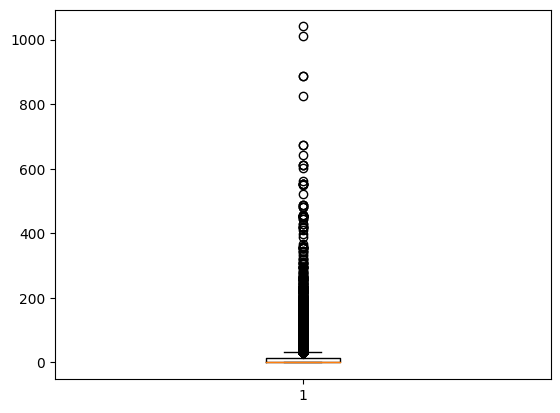

In [27]:
plt.boxplot(df_train["Weekly Deaths per Million"].dropna())
plt.show()

In [28]:
df_train.loc[df_train["Weekly Deaths per Million"] > 13].sort_values(by="Weekly Deaths per Million", ascending=False).head(10)

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
79586,Gibraltar,372.0,2021.0,11386.593,34.0,1040.710,11.0,7947.0,7947.0,NaN,NaN,527.0,24.33,24.33,NaN,NaN,16131.0,527.0,1.613
79585,Gibraltar,414.0,2021.0,12672.176,33.0,1010.101,17.0,7017.0,7017.0,NaN,NaN,520.0,21.48,21.48,NaN,NaN,15917.0,520.0,1.592
79587,Gibraltar,330.0,2021.0,10101.010,29.0,887.665,14.0,8877.0,8877.0,NaN,NaN,535.0,27.17,27.17,NaN,NaN,16376.0,535.0,1.638
79584,Gibraltar,472.0,2021.0,14447.505,29.0,887.665,20.0,6435.0,6435.0,NaN,NaN,713.0,19.70,19.70,NaN,NaN,21824.0,713.0,2.182
79583,Gibraltar,500.0,2021.0,15304.561,27.0,826.446,20.0,5847.0,5847.0,NaN,NaN,775.0,17.90,17.90,NaN,NaN,23722.0,775.0,2.372
79582,Gibraltar,528.0,2021.0,16161.616,22.0,673.401,28.0,5847.0,5847.0,NaN,NaN,904.0,17.90,17.90,NaN,NaN,27671.0,904.0,2.767
79590,Gibraltar,231.0,2021.0,7070.707,22.0,673.401,10.0,11073.0,11073.0,NaN,NaN,579.0,33.89,33.89,NaN,NaN,17723.0,579.0,1.772
62283,British Virgin Islands,877.0,2021.0,28179.423,20.0,642.632,2.0,NaN,NaN,NaN,NaN,273.0,NaN,NaN,NaN,NaN,8772.0,167.0,0.537
79589,Gibraltar,280.0,2021.0,8570.554,20.0,612.182,13.0,10539.0,10539.0,NaN,NaN,586.0,32.26,32.26,NaN,NaN,17937.0,586.0,1.794
79588,Gibraltar,296.0,2021.0,9060.300,20.0,612.182,14.0,10341.0,10341.0,NaN,NaN,642.0,31.65,31.65,NaN,NaN,19651.0,642.0,1.965


Here we can see some occurences of Weekly Cases per Million being higher than Weekly Cases, which does not make sense. This type of ocurrence will be removed from the dataset.

In [29]:
df_train.loc[(df_train["Weekly Deaths per Million"] > df_train["Weekly Deaths"])].sort_values(by="Weekly Deaths per Million", ascending=False).head(10)

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
79586,Gibraltar,372.0,2021.0,11386.593,34.0,1040.710,11.0,7947.0,7947.0,NaN,NaN,527.0,24.33,24.33,NaN,NaN,16131.0,527.0,1.613
79585,Gibraltar,414.0,2021.0,12672.176,33.0,1010.101,17.0,7017.0,7017.0,NaN,NaN,520.0,21.48,21.48,NaN,NaN,15917.0,520.0,1.592
79587,Gibraltar,330.0,2021.0,10101.010,29.0,887.665,14.0,8877.0,8877.0,NaN,NaN,535.0,27.17,27.17,NaN,NaN,16376.0,535.0,1.638
79584,Gibraltar,472.0,2021.0,14447.505,29.0,887.665,20.0,6435.0,6435.0,NaN,NaN,713.0,19.70,19.70,NaN,NaN,21824.0,713.0,2.182
79583,Gibraltar,500.0,2021.0,15304.561,27.0,826.446,20.0,5847.0,5847.0,NaN,NaN,775.0,17.90,17.90,NaN,NaN,23722.0,775.0,2.372
79590,Gibraltar,231.0,2021.0,7070.707,22.0,673.401,10.0,11073.0,11073.0,NaN,NaN,579.0,33.89,33.89,NaN,NaN,17723.0,579.0,1.772
79582,Gibraltar,528.0,2021.0,16161.616,22.0,673.401,28.0,5847.0,5847.0,NaN,NaN,904.0,17.90,17.90,NaN,NaN,27671.0,904.0,2.767
62283,British Virgin Islands,877.0,2021.0,28179.423,20.0,642.632,2.0,NaN,NaN,NaN,NaN,273.0,NaN,NaN,NaN,NaN,8772.0,167.0,0.537
79588,Gibraltar,296.0,2021.0,9060.300,20.0,612.182,14.0,10341.0,10341.0,NaN,NaN,642.0,31.65,31.65,NaN,NaN,19651.0,642.0,1.965
79589,Gibraltar,280.0,2021.0,8570.554,20.0,612.182,13.0,10539.0,10539.0,NaN,NaN,586.0,32.26,32.26,NaN,NaN,17937.0,586.0,1.794


In [30]:
df_train.drop(df_train.loc[(df_train["Weekly Deaths per Million"] > df_train["Weekly Deaths"])].index, inplace=True)

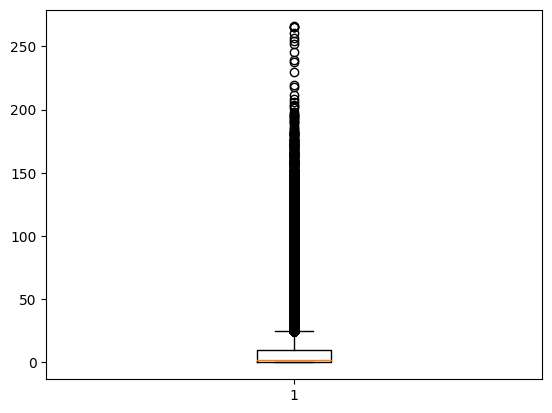

In [31]:
plt.boxplot(df_train["Weekly Deaths per Million"].dropna())
plt.show()

The highest outlier has decreased.
Going back to the previous analysis.

In [32]:
df_train.loc[df_train["Weekly Deaths per Million"] > 13].sort_values(by="Weekly Deaths per Million", ascending=False).head(10)

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
83534,Hong Kong,216980.0,2022.0,28951.597,1992.0,265.792,1840.0,14154947.0,6420707.0,5435581.0,2298659.0,71532.0,188.87,85.67,72.53,30.67,9545.0,13358.0,0.178
83535,Hong Kong,205994.0,2022.0,27485.737,1990.0,265.525,1796.0,14223600.0,6430782.0,5461118.0,2331700.0,70173.0,189.79,85.81,72.87,31.11,9363.0,12038.0,0.161
83533,Hong Kong,226467.0,2022.0,30217.445,1986.0,264.992,1903.0,14084171.0,6409800.0,5411009.0,2263362.0,73281.0,187.92,85.53,72.20,30.20,9778.0,14838.0,0.198
83536,Hong Kong,195053.0,2022.0,26025.882,1986.0,264.992,1634.0,14355969.0,6446767.0,5512562.0,2396640.0,67508.0,191.55,86.02,73.55,31.98,9008.0,9991.0,0.133
83532,Hong Kong,233838.0,2022.0,31200.956,1955.0,260.855,1921.0,14032641.0,6401432.0,5398913.0,2232296.0,74804.0,187.24,85.41,72.04,29.79,9981.0,16077.0,0.215
83537,Hong Kong,174704.0,2022.0,23310.719,1921.0,256.319,1451.0,14489110.0,6460340.0,5568504.0,2460266.0,65210.0,193.33,86.20,74.30,32.83,8701.0,8415.0,0.112
83538,Hong Kong,156423.0,2022.0,20871.489,1903.0,253.917,1356.0,14530886.0,6464394.0,5581458.0,2485034.0,63816.0,193.89,86.25,74.47,33.16,8515.0,7799.0,0.104
83531,Hong Kong,273774.0,2022.0,36529.608,1890.0,252.182,1957.0,13964111.0,6389961.0,5377620.0,2196530.0,76429.0,186.32,85.26,71.75,29.31,10198.0,17618.0,0.235
83539,Hong Kong,143583.0,2022.0,19158.250,1840.0,245.511,1301.0,14597067.0,6470965.0,5606779.0,2519323.0,63160.0,194.77,86.34,74.81,33.62,8427.0,7180.0,0.096
83540,Hong Kong,129970.0,2022.0,17341.870,1796.0,239.640,1207.0,14660688.0,6477869.0,5631192.0,2551627.0,62441.0,195.62,86.43,75.14,34.05,8331.0,6727.0,0.090


These values seem correct. Looking to the statistics of the data again:

In [33]:
df_train.describe()

,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
count,1.057110e+05,105856.000000,105685.00000,104724.000000,104702.000000,105856.000000,3.708100e+04,3.521800e+04,3.382800e+04,1.893600e+04,6.675900e+04,37081.000000,35218.000000,33828.000000,18936.000000,66759.000000,6.618300e+04,66183.000000
mean,1.159438e+05,2020.912447,1212.04826,1308.752101,9.888773,1296.856588,2.660444e+08,1.280782e+08,1.065970e+08,4.574802e+07,5.524140e+05,88.740652,42.814575,37.965184,19.838401,2695.860064,2.129154e+05,0.114064
std,6.973625e+05,0.727371,3470.31256,5817.329532,19.839311,5774.705228,1.073723e+09,5.138774e+08,4.465648e+08,1.904782e+08,2.792620e+06,74.922817,30.420185,29.417757,22.494968,3398.425031,1.145433e+06,0.195461
min,0.000000e+00,2020.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.090000e+02,2020.000000,23.24400,2.000000,0.125000,2.000000,1.631490e+06,9.672358e+05,7.793970e+05,4.582500e+04,2.153500e+03,16.920000,11.520000,7.440000,0.227500,402.000000,6.790000e+02,0.012000
50%,2.170000e+03,2021.000000,189.71800,29.000000,1.751000,28.000000,9.981222e+06,5.171888e+06,4.439644e+06,1.778304e+06,1.511200e+04,76.400000,45.265000,37.120000,9.160000,1543.000000,5.332000e+03,0.048000
75%,1.509800e+04,2021.000000,952.51500,213.000000,9.984750,209.000000,5.785526e+07,2.978733e+07,2.568903e+07,1.222364e+07,9.003550e+04,146.590000,70.310000,64.730000,36.472500,3898.000000,3.266050e+04,0.145000
max,2.406618e+07,2022.000000,76777.09600,103568.000000,265.792000,102123.000000,1.212140e+10,5.255161e+09,4.816606e+09,2.129044e+09,4.368841e+07,366.870000,128.780000,126.790000,125.850000,117862.000000,2.099974e+07,11.786000


##### Weekly deaths
There is also a very high number of weekly deaths.

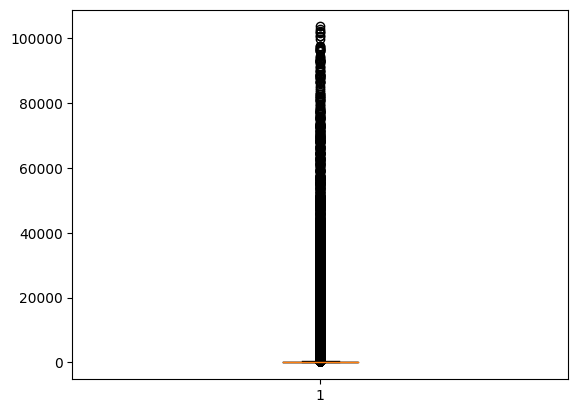

In [34]:
plt.boxplot(df_train["Weekly Deaths"].dropna())
plt.show()

Checking when Location is not World.

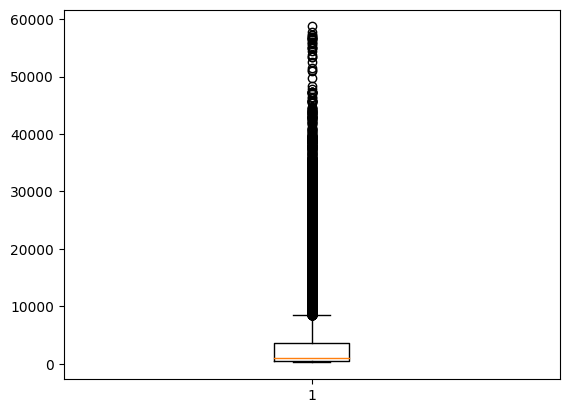

In [35]:
plt.boxplot(df_train.loc[((df_train["Weekly Deaths"] > 213) & (df_train["Location"] != "World")), "Weekly Deaths"].dropna())
plt.show()

In [36]:
df_train.loc[((df_train["Weekly Deaths"] > 213) & (df_train["Location"] != "World"))].sort_values(by="Weekly Deaths", ascending=False).head(10)

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
82487,High income,2534167.0,2021.0,2041.421,58742.0,47.320,55070.0,57220688.0,45957578.0,8693852.0,235.0,2539309.0,4.61,3.70,0.70,0.0,2046.0,1871118.0,0.151
82488,High income,2482463.0,2021.0,1999.770,57747.0,46.519,54446.0,60382796.0,47981515.0,9710281.0,255.0,2576801.0,4.86,3.87,0.78,0.0,2076.0,1859489.0,0.150
82478,High income,3302665.0,2021.0,2660.491,57332.0,46.184,56754.0,29689268.0,25585264.0,3167247.0,72.0,1891919.0,2.39,2.06,0.26,0.0,1524.0,1539141.0,0.124
82479,High income,3043529.0,2021.0,2451.742,57248.0,46.117,56485.0,34849324.0,29814472.0,3598502.0,84.0,2007473.0,2.81,2.40,0.29,0.0,1617.0,1656837.0,0.133
82477,High income,3391842.0,2021.0,2732.328,56992.0,45.910,56461.0,27224165.0,23489169.0,2948472.0,65.0,1800580.0,2.19,1.89,0.24,0.0,1450.0,1450665.0,0.117
82480,High income,2973237.0,2021.0,2395.117,56918.0,45.851,57016.0,36860404.0,31323317.0,3990547.0,94.0,2020932.0,2.97,2.52,0.32,0.0,1628.0,1664891.0,0.134
82483,High income,2766753.0,2021.0,2228.782,56754.0,45.719,57430.0,45320333.0,37592580.0,5814156.0,142.0,2240023.0,3.65,3.03,0.47,0.0,1804.0,1767502.0,0.142
82485,High income,2636176.0,2021.0,2123.595,56703.0,45.678,56072.0,50476935.0,41695645.0,6530195.0,154.0,2381978.0,4.07,3.36,0.53,0.0,1919.0,1856661.0,0.150
82484,High income,2691668.0,2021.0,2168.297,56604.0,45.598,57182.0,48518536.0,40241382.0,6225475.0,152.0,2315368.0,3.91,3.24,0.50,0.0,1865.0,1816637.0,0.146
82486,High income,2586833.0,2021.0,2083.846,56485.0,45.502,56076.0,51810403.0,42613196.0,6870031.0,157.0,2400764.0,4.17,3.43,0.55,0.0,1934.0,1856379.0,0.150


This High income location is not a valid location so it will be replaced by Nan and a new column "Income" will be created.

In [37]:
df_train["Income"] = len(df_train)*[np.nan]
df_train

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Income
0,World,2372.0,2020.0,0.300,65.0,0.008,344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,5023.0,2020.0,0.635,114.0,0.014,361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,World,5612.0,2020.0,0.710,116.0,0.015,431.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,World,7580.0,2020.0,0.958,153.0,0.019,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,World,8983.0,2020.0,1.136,187.0,0.024,506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128958,Zimbabwe,464.0,2022.0,29.012,13.0,0.813,9.0,11949993.0,6297324.0,4601845.0,1050824.0,5665.0,74.72,39.37,28.77,6.57,354.0,1427.0,0.009,NaN
128959,Zimbabwe,471.0,2022.0,29.449,12.0,0.750,7.0,11958771.0,6299348.0,4605821.0,1053602.0,5295.0,74.77,39.39,28.80,6.59,331.0,1362.0,0.009,NaN
128960,Zimbabwe,450.0,2022.0,28.136,13.0,0.813,5.0,NaN,NaN,NaN,NaN,5316.0,NaN,NaN,NaN,NaN,332.0,1483.0,0.009,NaN
128961,Zimbabwe,277.0,2022.0,17.320,6.0,0.375,7.0,11974313.0,6305470.0,4611113.0,1057730.0,5358.0,74.87,39.43,28.83,6.61,335.0,1633.0,0.010,NaN


In [38]:
df_train.loc[df_train.loc[(df_train["Location"] == "High income")].index, "Income"] = "High income"
df_train.loc[df_train.loc[(df_train["Location"] == "High income")].index, "Location"] = np.nan

In [39]:
df_train.loc[df_train.loc[(df_train["Income"] == "High income")].index]

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Income
21227,NaN,43.0,2020.0,0.035,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income
21228,NaN,57.0,2020.0,0.046,0.0,0.000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income
21229,NaN,67.0,2020.0,0.054,0.0,0.000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income
21230,NaN,87.0,2020.0,0.070,0.0,0.000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income
21231,NaN,95.0,2020.0,0.077,0.0,0.000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82871,NaN,3820872.0,2022.0,3077.937,7032.0,5.665,6386.0,2.500643e+09,971185445.0,909768623.0,646326775.0,838809.0,201.44,78.23,73.29,52.07,676.0,84449.0,0.007,High income
82872,NaN,4059751.0,2022.0,3270.368,7182.0,5.786,6523.0,2.508256e+09,972115836.0,910858166.0,647769334.0,811067.0,202.05,78.31,73.37,52.18,653.0,81806.0,0.007,High income
82873,NaN,4213551.0,2022.0,3394.263,6717.0,5.411,7785.0,2.509263e+09,972207242.0,910976950.0,648481325.0,816508.0,202.14,78.32,73.38,52.24,658.0,82100.0,0.007,High income
82874,NaN,4360348.0,2022.0,3512.517,6853.0,5.520,8108.0,2.510444e+09,972301572.0,911097642.0,649334238.0,806495.0,202.23,78.32,73.39,52.31,650.0,80275.0,0.006,High income


Looking back at the highest weekly deaths:

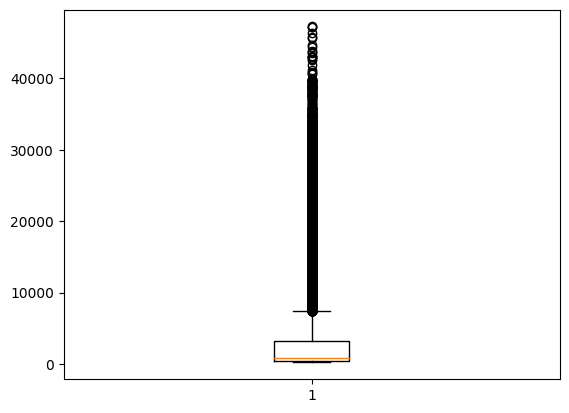

In [40]:
plt.boxplot(df_train.loc[((df_train["Weekly Deaths"] > 213) & df_train["Location"].notna() & (df_train["Location"] != "World")), "Weekly Deaths"])
plt.show()

In [41]:
df_train.loc[((df_train["Weekly Deaths"] > 213) & df_train["Location"].notna() & (df_train["Location"] != "World"))].sort_values(by="Weekly Deaths", ascending=False).head(10)

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Income
125612,Upper middle income,1611529.0,2021.0,644.244,47245.0,18.887,44366.0,274437294.0,73068359.0,29858489.0,134.0,6601184.0,10.97,2.92,1.19,0.0,2639.0,1668414.0,0.067,NaN
125614,Upper middle income,1629937.0,2021.0,651.603,47139.0,18.845,43847.0,288136591.0,77029621.0,32522628.0,135.0,6742573.0,11.52,3.08,1.30,0.0,2695.0,1659388.0,0.066,NaN
125613,Upper middle income,1633791.0,2021.0,653.143,47138.0,18.844,44141.0,281112766.0,75091623.0,30948041.0,135.0,6800276.0,11.24,3.00,1.24,0.0,2719.0,1682825.0,0.067,NaN
125615,Upper middle income,1602628.0,2021.0,640.685,46355.0,18.531,42987.0,294756740.0,78413789.0,33501142.0,136.0,6397500.0,11.78,3.13,1.34,0.0,2558.0,1530647.0,0.061,NaN
125611,Upper middle income,1569726.0,2021.0,627.532,45823.0,18.319,44635.0,263513924.0,70649651.0,28753726.0,134.0,6343144.0,10.53,2.82,1.15,0.0,2536.0,1638533.0,0.066,NaN
125616,Upper middle income,1612722.0,2021.0,644.721,45591.0,18.226,43673.0,301430393.0,80071166.0,34742674.0,137.0,6128203.0,12.05,3.20,1.39,0.0,2450.0,1545976.0,0.062,NaN
125617,Upper middle income,1627555.0,2021.0,650.650,44635.0,17.844,42970.0,305513036.0,81064031.0,35411599.0,137.0,6000877.0,12.21,3.24,1.42,0.0,2399.0,1534550.0,0.061,NaN
125618,Upper middle income,1625338.0,2021.0,649.764,44366.0,17.736,43103.0,314448077.0,83174472.0,37029883.0,138.0,5677513.0,12.57,3.33,1.48,0.0,2270.0,1455525.0,0.058,NaN
125619,Upper middle income,1608313.0,2021.0,642.958,43847.0,17.529,42565.0,328463115.0,86134852.0,39184845.0,140.0,5821786.0,13.13,3.44,1.57,0.0,2327.0,1336815.0,0.053,NaN
125621,Upper middle income,1567610.0,2021.0,626.686,43673.0,17.459,42265.0,346622751.0,89970130.0,41865594.0,146.0,6468965.0,13.86,3.60,1.67,0.0,2586.0,1406381.0,0.056,NaN


Upper middle income is not a location. Adding it to the Income column

In [42]:
df_train.loc[df_train.loc[(df_train["Location"] == "Upper middle income")].index, "Income"] = "Upper middle income"
df_train.loc[df_train.loc[(df_train["Location"] == "Upper middle income")].index, "Location"] = np.nan

In [43]:
df_train.loc[((df_train["Weekly Deaths"] > 213) & df_train["Location"].notna() & (df_train["Location"] != "World"))].sort_values(by="Weekly Deaths", ascending=False).head(10)

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Income
55519,Asia,2431272.0,2021.0,518.038,39742.0,8.468,35770.0,857564682.0,246024422.0,97252941.0,9.0,18901466.0,18.27,5.24,2.07,0.0,4027.0,2567435.0,0.055,NaN
55520,Asia,2371192.0,2021.0,505.236,39669.0,8.452,34645.0,873680856.0,247657758.0,97855100.0,9.0,18936452.0,18.62,5.28,2.09,0.0,4035.0,2645068.0,0.056,NaN
55518,Asia,2548221.0,2021.0,542.956,39611.0,8.440,36825.0,818883387.0,240428612.0,94952825.0,9.0,17909479.0,17.45,5.12,2.02,0.0,3816.0,2284817.0,0.049,NaN
55516,Asia,2720553.0,2021.0,579.675,39575.0,8.432,37850.0,779036438.0,235101652.0,92505958.0,9.0,16858233.0,16.60,5.01,1.97,0.0,3592.0,2107525.0,0.045,NaN
55510,Asia,3366143.0,2021.0,717.233,39552.0,8.427,39575.0,661138720.0,221036162.0,83439734.0,8.0,12741711.0,14.09,4.71,1.78,0.0,2715.0,2205979.0,0.047,NaN
55511,Asia,3299258.0,2021.0,702.982,39537.0,8.424,39386.0,676565376.0,222948906.0,85097713.0,8.0,13629189.0,14.42,4.75,1.81,0.0,2904.0,2202938.0,0.047,NaN
55512,Asia,3205763.0,2021.0,683.060,39402.0,8.395,39611.0,693431853.0,224976308.0,86957755.0,8.0,14057087.0,14.78,4.79,1.85,0.0,2995.0,2115032.0,0.045,NaN
55517,Asia,2632541.0,2021.0,560.922,39386.0,8.392,37531.0,796288271.0,237210248.0,93511392.0,9.0,17162043.0,16.97,5.05,1.99,0.0,3657.0,2165705.0,0.046,NaN
55515,Asia,2811568.0,2021.0,599.068,39252.0,8.364,38626.0,760438013.0,232296837.0,90717214.0,9.0,16347193.0,16.20,4.95,1.93,0.0,3483.0,2059689.0,0.044,NaN
75097,Europe,1411933.0,2021.0,1885.959,39047.0,52.156,36955.0,19924203.0,18241153.0,1651624.0,201.0,1044159.0,2.66,2.44,0.22,0.0,1395.0,864266.0,0.115,NaN


Now the weekly deaths seem correct.

In [44]:
set([loc for loc in df_train["Location"].dropna().values if "income" in loc])

{'Low income', 'Lower middle income'}

Removing income-related values from Location

In [45]:
df_train.loc[df_train.loc[(df_train["Location"] == "Low income")].index, "Income"] = "Low income"
df_train.loc[df_train.loc[(df_train["Location"] == "Low income")].index, "Location"] = np.nan
df_train.loc[df_train.loc[(df_train["Location"] == "Lower middle income")].index, "Income"] = "Lower middle income"
df_train.loc[df_train.loc[(df_train["Location"] == "Lower middle income")].index, "Location"] = np.nan

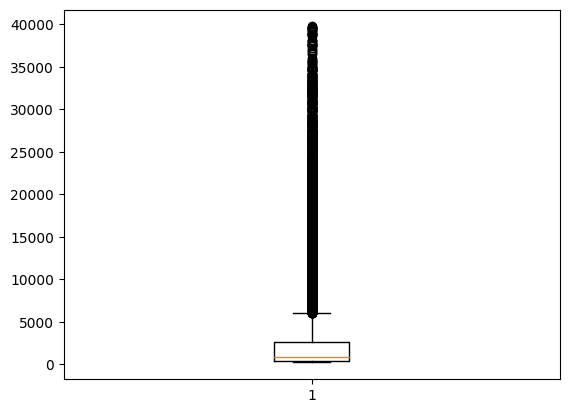

In [46]:
plt.boxplot(df_train.loc[((df_train["Weekly Deaths"] > 213) & df_train["Location"].notna() & (df_train["Location"] != "World")), "Weekly Deaths"])
plt.show()

There is a decrease on outliers.

##### Daily Vaccinations

In [47]:
df_train.describe()

,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
count,1.057110e+05,105856.000000,105685.00000,104724.000000,104702.000000,105856.000000,3.708100e+04,3.521800e+04,3.382800e+04,1.893600e+04,6.675900e+04,37081.000000,35218.000000,33828.000000,18936.000000,66759.000000,6.618300e+04,66183.000000
mean,1.159438e+05,2020.912447,1212.04826,1308.752101,9.888773,1296.856588,2.660444e+08,1.280782e+08,1.065970e+08,4.574802e+07,5.524140e+05,88.740652,42.814575,37.965184,19.838401,2695.860064,2.129154e+05,0.114064
std,6.973625e+05,0.727371,3470.31256,5817.329532,19.839311,5774.705228,1.073723e+09,5.138774e+08,4.465648e+08,1.904782e+08,2.792620e+06,74.922817,30.420185,29.417757,22.494968,3398.425031,1.145433e+06,0.195461
min,0.000000e+00,2020.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.090000e+02,2020.000000,23.24400,2.000000,0.125000,2.000000,1.631490e+06,9.672358e+05,7.793970e+05,4.582500e+04,2.153500e+03,16.920000,11.520000,7.440000,0.227500,402.000000,6.790000e+02,0.012000
50%,2.170000e+03,2021.000000,189.71800,29.000000,1.751000,28.000000,9.981222e+06,5.171888e+06,4.439644e+06,1.778304e+06,1.511200e+04,76.400000,45.265000,37.120000,9.160000,1543.000000,5.332000e+03,0.048000
75%,1.509800e+04,2021.000000,952.51500,213.000000,9.984750,209.000000,5.785526e+07,2.978733e+07,2.568903e+07,1.222364e+07,9.003550e+04,146.590000,70.310000,64.730000,36.472500,3898.000000,3.266050e+04,0.145000
max,2.406618e+07,2022.000000,76777.09600,103568.000000,265.792000,102123.000000,1.212140e+10,5.255161e+09,4.816606e+09,2.129044e+09,4.368841e+07,366.870000,128.780000,126.790000,125.850000,117862.000000,2.099974e+07,11.786000


In [48]:
df_train.loc[(df_train["Daily Vaccinations"] > 100000) & (df_train["Location"] !="World")].sort_values(by="Daily Vaccinations", ascending=False).head(10)

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Income
55547,Asia,929752.0,2021.0,198.105,17973.0,3.830,16322.0,1.794011e+09,1.078355e+09,148038985.0,52.0,33491619.0,38.23,22.98,3.15,0.00,7136.0,14955917.0,0.319,NaN
55548,Asia,947536.0,2021.0,201.894,17429.0,3.714,16262.0,1.851914e+09,1.106289e+09,153586492.0,53.0,33203998.0,39.46,23.57,3.27,0.00,7075.0,14177306.0,0.302,NaN
55580,Asia,1816772.0,2021.0,387.104,30274.0,6.451,33841.0,2.767556e+09,1.369822e+09,301325318.0,7373368.0,33032041.0,58.97,29.19,6.42,0.16,7038.0,15521423.0,0.331,NaN
55546,Asia,926832.0,2021.0,197.483,18214.0,3.881,16473.0,1.760541e+09,1.068884e+09,145676868.0,52.0,32742399.0,37.51,22.77,3.10,0.00,6977.0,14532857.0,0.310,NaN
55545,Asia,928143.0,2021.0,197.762,18553.0,3.953,16634.0,1.725051e+09,1.059764e+09,143297458.0,51.0,32394622.0,36.76,22.58,3.05,0.00,6902.0,14231386.0,0.303,NaN
55581,Asia,1836060.0,2021.0,391.214,31348.0,6.679,33054.0,2.827073e+09,1.386458e+09,309915695.0,7767954.0,32157810.0,60.24,29.54,6.60,0.17,6852.0,15446495.0,0.329,NaN
55579,Asia,1800533.0,2021.0,383.644,29978.0,6.387,32652.0,2.723717e+09,1.353415e+09,294167440.0,7166299.0,32126623.0,58.03,28.84,6.27,0.15,6845.0,15012071.0,0.320,NaN
55549,Asia,967807.0,2021.0,206.213,16878.0,3.596,17240.0,1.909935e+09,1.119680e+09,159693540.0,298896.0,32051731.0,40.70,23.86,3.40,0.01,6829.0,13961546.0,0.297,NaN
55582,Asia,1858278.0,2021.0,395.948,31867.0,6.790,32945.0,2.857457e+09,1.395337e+09,314464793.0,7940108.0,31832386.0,60.88,29.73,6.70,0.17,6783.0,15505849.0,0.330,NaN
55578,Asia,1788565.0,2021.0,381.094,29811.0,6.352,32238.0,2.692448e+09,1.346291e+09,289766493.0,6998940.0,31495166.0,57.37,28.69,6.17,0.15,6711.0,14796270.0,0.315,NaN


Seems correct. No other data looks off.

## Normalization and discretization

Normalization will not be applied to the data before deciding the model architecture.

### Creating a new feature related to the vaccine existence.

In [49]:
df_train["After Vaccine"] = df_train["People Vaccinated"].apply(lambda x: False if pd.isna(x) else True)
df_train

,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Next Week's Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,...,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Income,After Vaccine
0,World,2372.0,2020.0,0.300,65.0,0.008,344.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,World,5023.0,2020.0,0.635,114.0,0.014,361.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,World,5612.0,2020.0,0.710,116.0,0.015,431.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,World,7580.0,2020.0,0.958,153.0,0.019,463.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,World,8983.0,2020.0,1.136,187.0,0.024,506.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128958,Zimbabwe,464.0,2022.0,29.012,13.0,0.813,9.0,11949993.0,6297324.0,4601845.0,...,5665.0,74.72,39.37,28.77,6.57,354.0,1427.0,0.009,NaN,True
128959,Zimbabwe,471.0,2022.0,29.449,12.0,0.750,7.0,11958771.0,6299348.0,4605821.0,...,5295.0,74.77,39.39,28.80,6.59,331.0,1362.0,0.009,NaN,True
128960,Zimbabwe,450.0,2022.0,28.136,13.0,0.813,5.0,NaN,NaN,NaN,...,5316.0,NaN,NaN,NaN,NaN,332.0,1483.0,0.009,NaN,False
128961,Zimbabwe,277.0,2022.0,17.320,6.0,0.375,7.0,11974313.0,6305470.0,4611113.0,...,5358.0,74.87,39.43,28.83,6.61,335.0,1633.0,0.010,NaN,True


In [50]:
df_train["After Vaccine"].unique()

array([False,  True])

### Discretization of Income

In [51]:
df_train["Income"].unique()

array([nan, 'High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [52]:
mapping = {
    'High income': 4,
    'Upper middle income': 3,
    'Lower middle income': 2,
    'Low income': 1
}

In [53]:
df_train["Income"] = df_train["Income"].apply(lambda x: x if pd.isna(x) else mapping[x])
df_train["Income"].unique()

array([nan,  4.,  1.,  2.,  3.])

## Changing Column Types

In [54]:
df_train["Income"] = df_train["Income"].astype('category')

In [55]:
df_train["Location"] = df_train["Location"].astype('category')

In [56]:
df_train["Year"] = df_train["Year"].astype('category')

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105856 entries, 0 to 128962
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   Location                             103203 non-null  category
 1   Weekly Cases                         105711 non-null  float64 
 2   Year                                 105856 non-null  category
 3   Weekly Cases per Million             105685 non-null  float64 
 4   Weekly Deaths                        104724 non-null  float64 
 5   Weekly Deaths per Million            104702 non-null  float64 
 6   Next Week's Deaths                   105856 non-null  float64 
 7   Total Vaccinations                   37081 non-null   float64 
 8   People Vaccinated                    35218 non-null   float64 
 9   People Fully Vaccinated              33828 non-null   float64 
 10  Total Boosters                       18936 non-null   float64 
 11  

## Saving dataset

In [58]:
df_train.reset_index(inplace=True, drop=True)

In [59]:
df_train.to_csv(f"{DATA_PATH}/df_preprocessed.csv")

## Normalization

The normalization method to be used is the Z-score normalization that follows the formula bellow;

$$
[ Z = \frac{X - \mu}{\sigma} ] 
$$

In [60]:
numetric_cols = df_train.select_dtypes(include="float64").columns

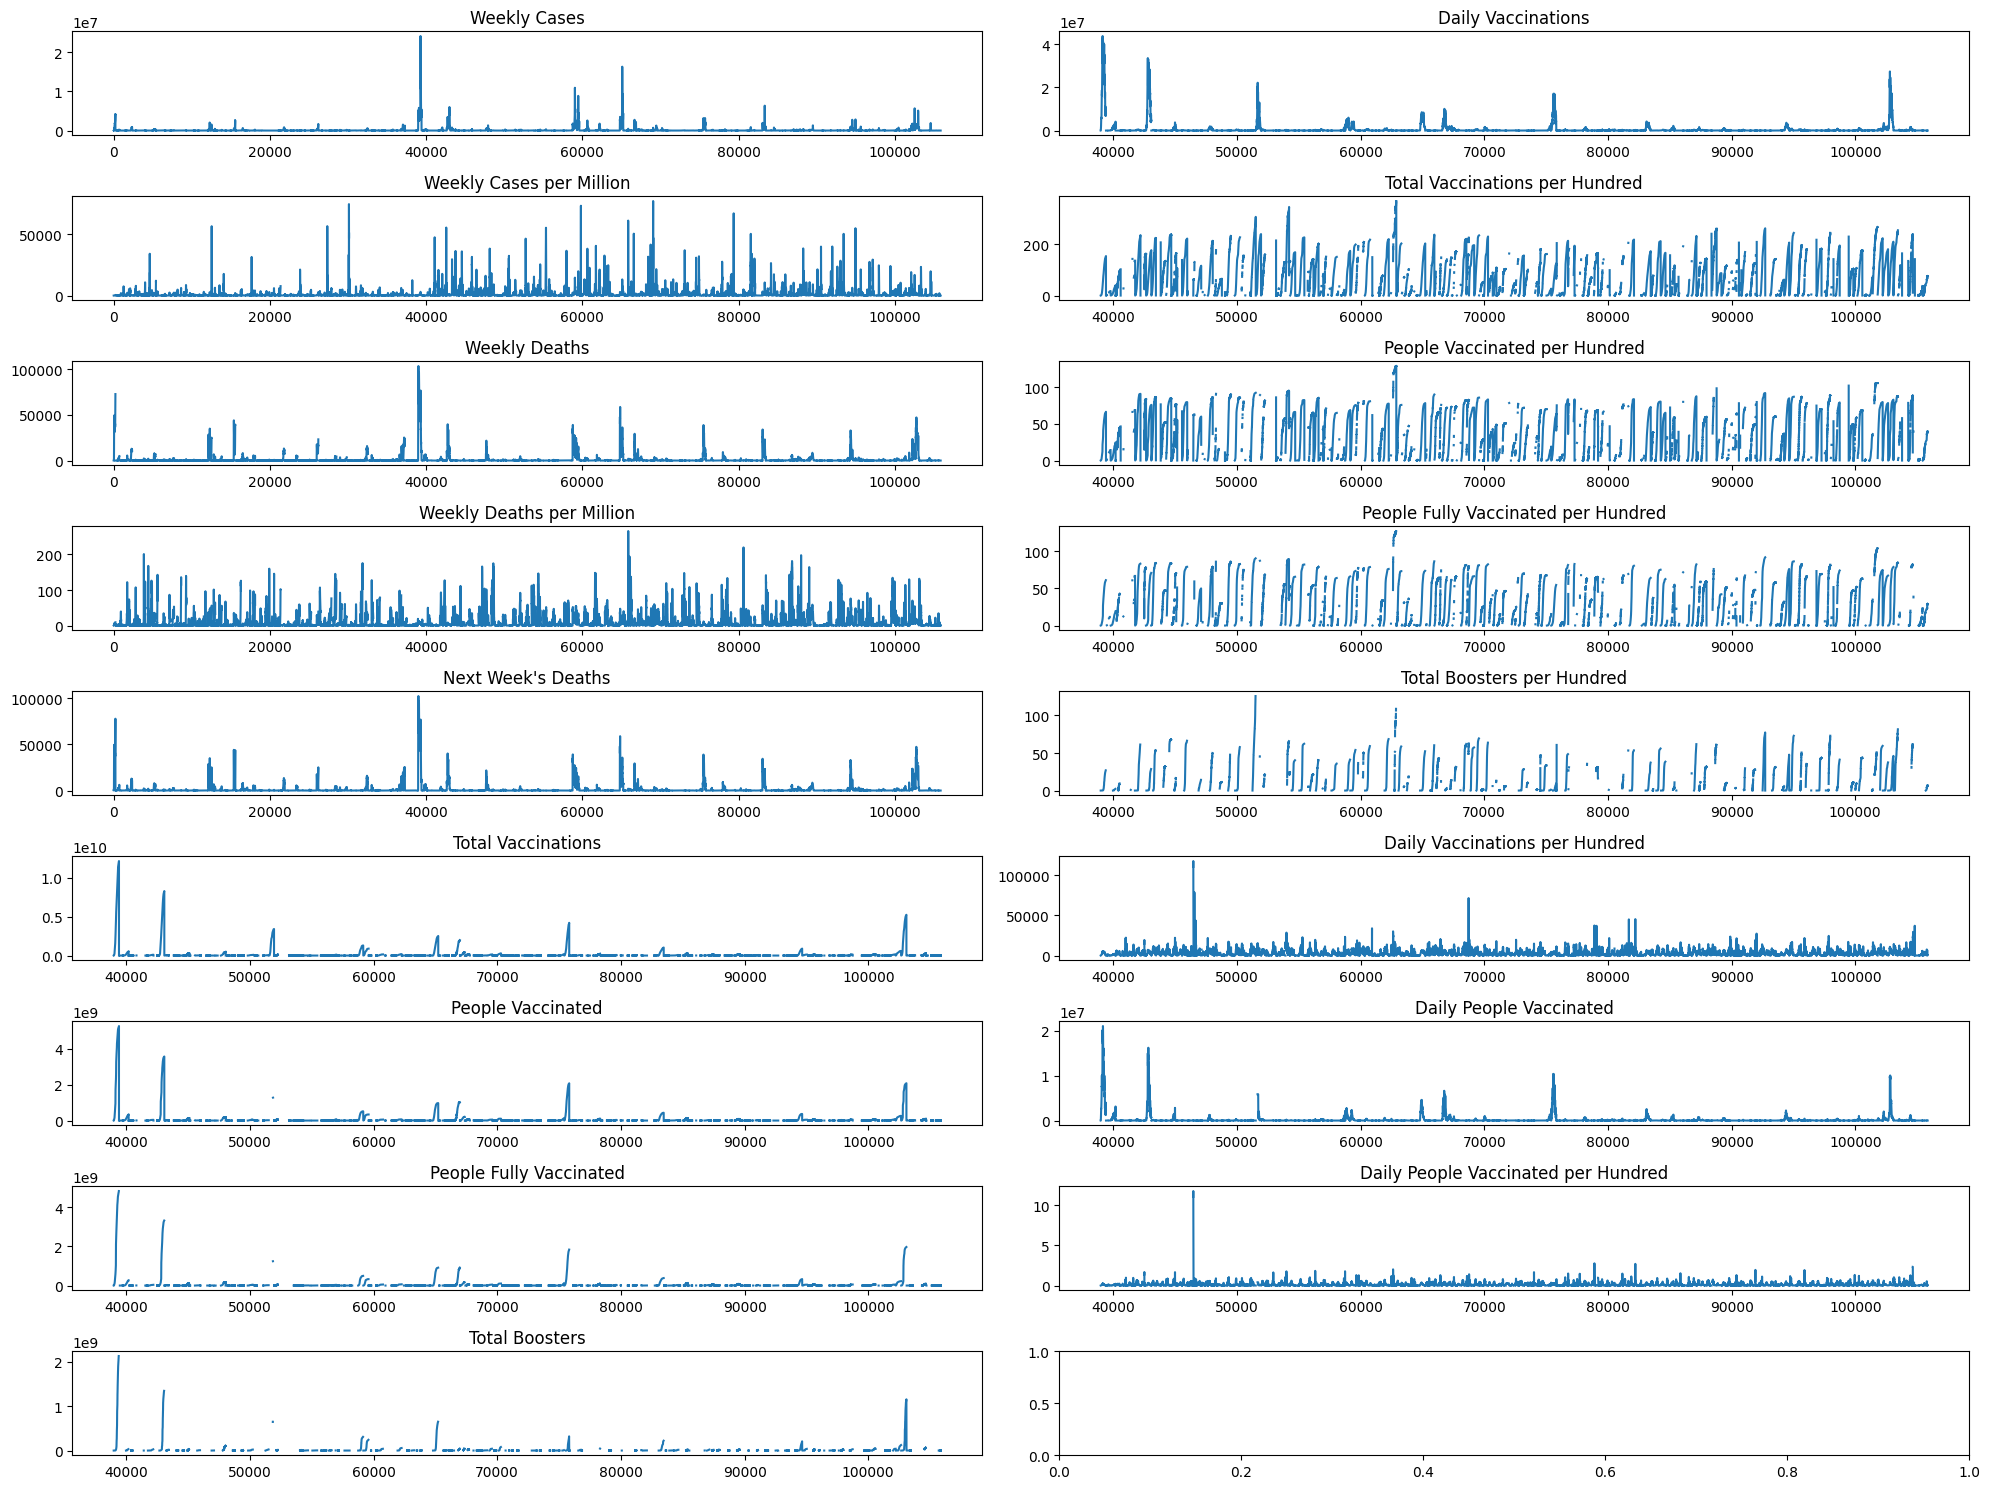

In [61]:
# before

i_size = 9
j_size = 2
fig, ax = plt.subplots(9, 2, figsize=(20, 15))
i, j = 0, 0
for col in numetric_cols:
    ax[i][j].plot(df_train[col])
    ax[i][j].set_title(col)
    i += 1
    if i % i_size == 0:
        j += 1
        i = 0
    if j % j_size == 0 and j != 0:
        break
fig.tight_layout()
plt.show()

In [62]:
scaler = StandardScaler()
df_train[numetric_cols] = scaler.fit_transform(df_train.select_dtypes(include="float64"))

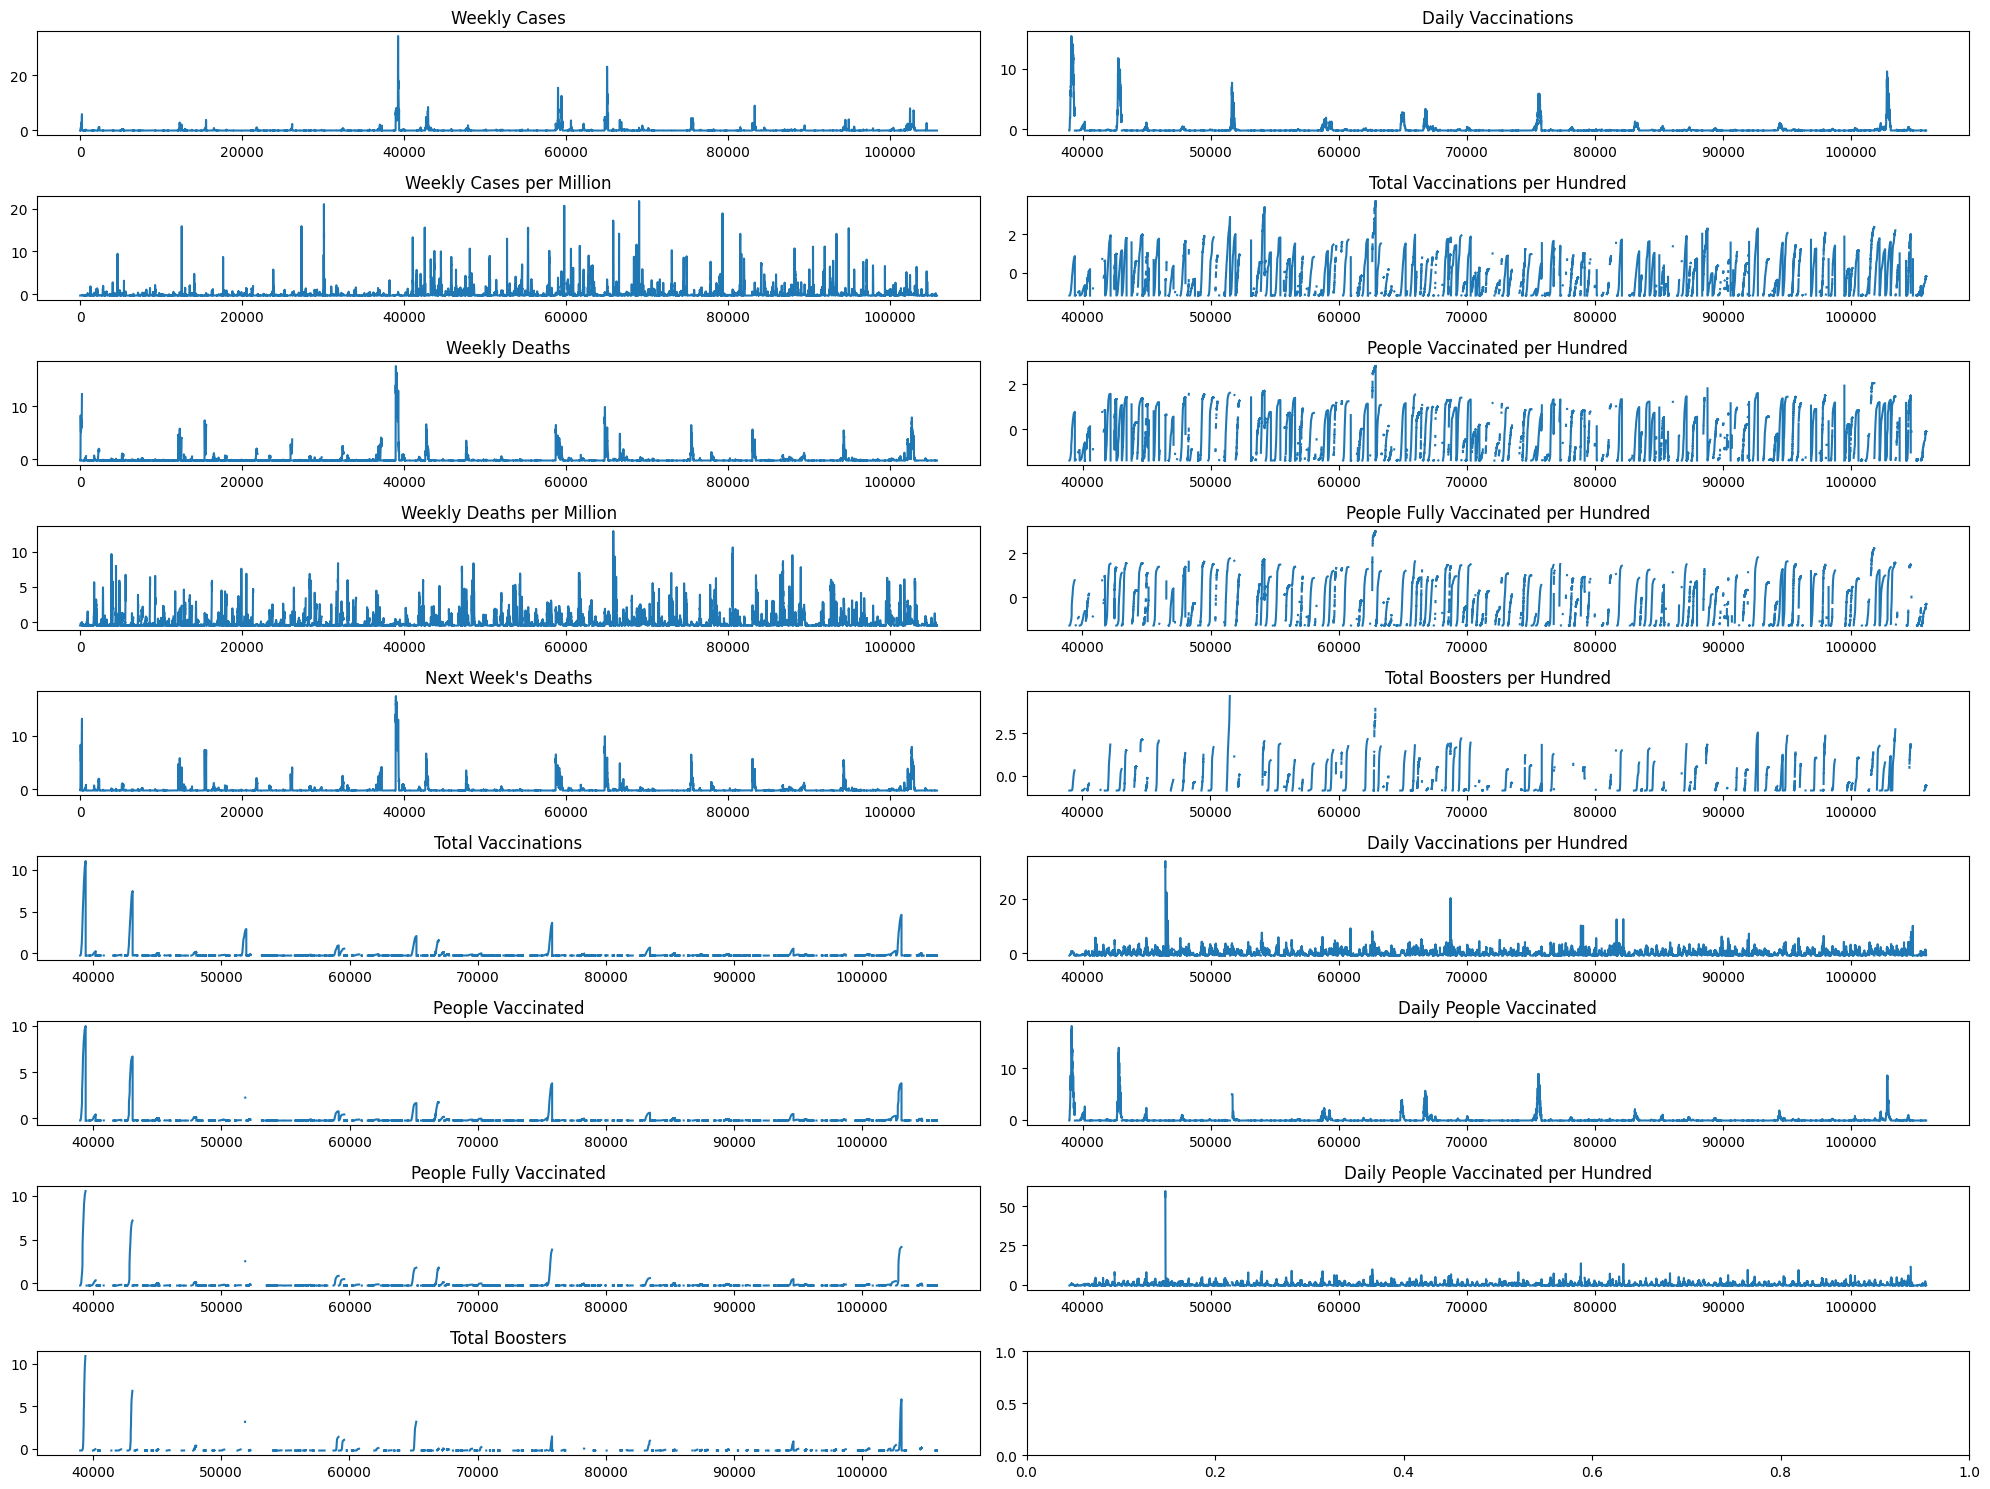

In [63]:
i_size = 9
j_size = 2
fig, ax = plt.subplots(9, 2, figsize=(20, 15))
i, j = 0, 0
for col in numetric_cols:
    ax[i][j].plot(df_train[col])
    ax[i][j].set_title(col)
    i += 1
    if i % i_size == 0:
        j += 1
        i = 0
    if j % j_size == 0 and j != 0:
        break
fig.tight_layout()
plt.show()

In [64]:
df_train.reset_index(inplace=True, drop=True)

In [65]:
df_train.to_csv(f"{DATA_PATH}/df_preprocessed_normalized.csv")